In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=100,  download_if_missing = True, resize=0.4, color=True)
n_samples, h, w, rgb = lfw_people.images.shape

X = lfw_people.data
Y = lfw_people.target

print(n_samples,h,w,rgb)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=47)

1140 50 37 3


(763, 5550)
(763,)
(377, 5550)
(377,)


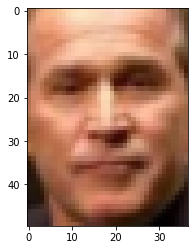

array([1, 1, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 1, 0, 2, 0, 3, 0, 2, 2, 0,
       1, 4, 1, 4, 0, 3, 4, 2, 2, 4, 3, 0, 0, 2, 2, 2, 0, 1, 2, 4, 2, 2,
       3, 4, 2, 1, 0, 3, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 3, 0, 1,
       3, 2, 4, 3, 3, 3, 4, 2, 1, 3, 4, 2, 0, 2, 0, 0, 0, 2, 2, 2, 3, 2,
       1, 4, 0, 3, 1, 0, 4, 2, 2, 0, 1, 2, 2, 0, 1, 3, 2, 1, 4, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 3, 2, 1, 4, 2, 0, 2, 2, 0, 3, 2, 3, 4, 2, 3,
       1, 0, 3, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 4, 0, 1, 0, 0, 2,
       0, 0, 2, 2, 3, 2, 1, 2, 1, 2, 0, 4, 3, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       0, 3, 0, 3, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 4, 4, 3, 4, 0,
       2, 1, 0, 1, 2, 2, 0, 4, 2, 2, 3, 3, 2, 3, 2, 2, 0, 3, 0, 3, 0, 0,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 4, 4, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2, 4, 0, 1, 4, 0, 2, 0, 2, 2, 3,
       4, 4, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,

In [2]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


x_train = x_train.reshape(x_train.shape[0],h,w,3)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],h,w,3)
x_test = x_test.astype('float32')
x_test = x_test/255

plt.imshow(x_test[4])
plt.show()
y_test

In [3]:
model = tf.keras.models.Sequential()

img_input = tf.keras.layers.Input(shape=(50,37,3))

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x) #d
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(img_input,output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model.fit(x_train, steps_per_epoch=2, epochs=80, validation_data=y_train, validation_steps=7, verbose=2)

ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_3/Conv2D' (op: 'Conv2D') with input shapes: [?,4,2,256], [3,3,256,512].

In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(256, (3, 3), input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.3)

Train on 534 samples, validate on 229 samples
Epoch 1/3
534/534 [==============================] - 7s 14ms/sample - loss: -1876.3691 - accuracy: 0.0918 - val_loss: -9333.0679 - val_accuracy: 0.1354
Epoch 2/3
534/534 [==============================] - 6s 12ms/sample - loss: -50174.9024 - accuracy: 0.0880 - val_loss: -134737.9492 - val_accuracy: 0.1354
Epoch 3/3
534/534 [==============================] - 6s 12ms/sample - loss: -359335.2549 - accuracy: 0.0880 - val_loss: -775586.0442 - val_accuracy: 0.1354


In [5]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 


model.fit(x_train, y_train, epochs=8) 

Train on 763 samples
Epoch 1/8
763/763 [==============================] - 0s 451us/sample - loss: 1.8611 - accuracy: 0.3775
Epoch 2/8
763/763 [==============================] - 0s 101us/sample - loss: 1.4074 - accuracy: 0.4797
Epoch 3/8
763/763 [==============================] - 0s 100us/sample - loss: 1.2494 - accuracy: 0.5295
Epoch 4/8
763/763 [==============================] - 0s 105us/sample - loss: 1.1688 - accuracy: 0.5898
Epoch 5/8
763/763 [==============================] - 0s 120us/sample - loss: 1.0192 - accuracy: 0.6212
Epoch 6/8
763/763 [==============================] - 0s 107us/sample - loss: 0.9846 - accuracy: 0.6750
Epoch 7/8
763/763 [==============================] - 0s 98us/sample - loss: 0.9609 - accuracy: 0.6396
Epoch 8/8
763/763 [==============================] - 0s 97us/sample - loss: 0.8682 - accuracy: 0.6815


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(input_shape=(50,37,3,), target_shape=(50, 37, 3)),

    tf.keras.layers.Conv2D(kernel_size=3, filters=12, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', use_bias=False, strides=2),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(kernel_size=6, filters=32, padding='same', use_bias=False, strides=2),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, use_bias=False),
    tf.keras.layers.BatchNormalization(scale=False, center=True),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 50, 37, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 37, 12)        324       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 37, 12)        36        
_________________________________________________________________
activation_3 (Activation)    (None, 50, 37, 12)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 19, 24)        10368     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 19, 24)        72        
_________________________________________________________________
activation_4 (Activation)    (None, 25, 19, 24)       

In [7]:
BATCH_SIZE = 431 #7
EPOCHS = 10
steps_per_epoch = 862//BATCH_SIZE

def lr_decay(epoch):
    return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

history = model.fit(x_train, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=y_train, validation_steps=1, callbacks=[lr_decay_callback])

ValueError: The number of samples 763 is not divisible by steps 2. Please change the number of steps to a value that can consume all the samples

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Calculate validation loss and validation accuracy
print(val_loss, val_acc) 

426/426 [==============================] - 0s 225us/sample - loss: 1.1839 - accuracy: 0.6150
1.183876675339372 0.6150235


In [15]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [16]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [17]:
predictions = new_model.predict(x_test)

In [18]:
import numpy as np

print(np.argmax(predictions[0]))

3


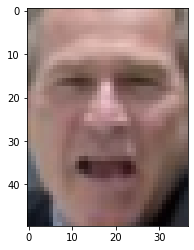

In [19]:
plt.imshow(x_test[0])
plt.show()